## 1. Aprendizado Supervisionado.

👉 Você **tem rótulos**.
👉 O modelo aprende a mapear **entrada → saída**.

### Principais métodos supervisionados

* Regressão Linear / Logística
* KNN (K-Nearest Neighbors)
* SVM (Support Vector Machine)
* Naive Bayes
* Árvores de Decisão
* Random Forest
* Redes Neurais Artificiais

---

### Situações de uso dos principais modelos

#### **KNN**

**Quando usar:**

* Dataset **pequeno ou médio**
* Dados bem distribuídos
* Problemas simples de **classificação ou regressão**
* Quando você quer algo **fácil de implementar**

**Exemplos:**

* Classificar cliente como bom ou mau pagador
* Reconhecimento simples de padrões
* Sistemas de recomendação básicos

**Não usar quando:**

* Dataset muito grande
* Muitas dimensões (sofre com a “maldição da dimensionalidade”)

---

#### **SVM**

**Quando usar:**

* Dados de alta dimensionalidade
* Separação clara (ou quase) entre classes
* Dataset pequeno a médio

**Exemplos:**

* Classificação de textos (spam / não spam)
* Bioinformática
* Reconhecimento de padrões complexos

**Pontos fortes:**

* Funciona bem com poucos dados
* Kernel trick resolve problemas não lineares

---

#### **Naive Bayes**

**Quando usar:**

* Dados categóricos
* Textos
* Quando independência entre atributos é aceitável

**Exemplos:**

* Filtro de spam
* Classificação de sentimentos
* Classificação de documentos

**Vantagem:**

* Muito rápido
* Funciona bem mesmo com dados “imperfeitos”

---

#### **Redes Neurais Artificiais (RNA)**

**Quando usar:**

* Grandes volumes de dados
* Relações **não lineares complexas**
* Imagens, áudio, texto, séries temporais

**Exemplos:**

* Reconhecimento facial
* Detecção de fraude
* Previsão de demanda
* NLP (processamento de linguagem natural)

**Não usar quando:**

* Dataset pequeno
* Pouco poder computacional
* Necessidade alta de interpretabilidade

---

## 2. Aprendizado Não Supervisionado

👉 **Não há rótulos**.
👉 O modelo tenta encontrar **padrões escondidos** nos dados.

### Principais métodos não supervisionados

* K-Means
* DBSCAN
* Hierarchical Clustering
* PCA (redução de dimensionalidade)
* Autoencoders

---

### Situações de uso dos principais modelos

#### **K-Means**

**Quando usar:**

* Quer segmentar dados
* Número de grupos é conhecido (ou estimável)

**Exemplos:**

* Segmentação de clientes
* Agrupamento de perfis de consumo
* Análise exploratória de dados

**Limitações:**

* Precisa definir K
* Sensível a outliers


## 3. Comparação direta (pra fixar)

| Situação                  | Use                |
| ------------------------- | ------------------ |
| Tem rótulo                | Supervisionado     |
| Não tem rótulo            | Não supervisionado |
| Dataset pequeno           | KNN, SVM           |
| Dataset grande            | Redes Neurais      |
| Precisa explicar o modelo | Árvore, Regressão  |
| Quer explorar padrões     | K-Means, PCA       |

---

## Conclusão que salva prova

* **Supervisionado** = prever algo conhecido
* **Não supervisionado** = descobrir algo escondido
* **KNN** = simples, lento, intuitivo
* **RNA** = poderoso, caro, complexo


Passo a passo para tratamento do dataset
1. Pré-processamento

Verificar valores nulos

Verificar tipos

Descrever tipos e valores diferentes

Trazer valores alfanuméricos para valores quantificados

Normalizar valores

Eliminar outliers

2. Seleção de atributos

Mapa de calor dos atributos para ver quais são importantes

Gráficos de barras podem ajudar para visualizar valores alfanuméricos

3. Modelos preditivos (aprendizado supervisionado)

KNN

SVM

Naive Bayes

4. Aprendizado não supervisionado

K-Means

------------------------------------------------------------------------------------------------------------------------------------------------
Quando você DEVE tratar outliers

✔ KNN
✔ K-Means
✔ Regressão linear
✔ SVM
✔ Redes neurais

Quando pode ignorar:

Árvores de decisão

Random Forest

XGBoost
Esses modelos são menos sensíveis.
------------------------------------------------------------------------------------------------------------------------------------------------
🔹 BLOCO 8 – OUTLIERS (o que são e por que tratar)
O que é um outlier

Outlier é um valor numericamente extremo que:

Não representa o comportamento normal dos dados

Distorce média, variância e distância

Detona modelos baseados em distância (KNN, K-Means, SVM)

Exemplo mental:

Renda média: 5 mil

Um cara com renda de 5 milhões
Ele não é “errado”, mas estatisticamente bagunça tudo.

Quando você DEVE tratar outliers

✔ KNN
✔ K-Means
✔ Regressão linear
✔ SVM
✔ Redes neurais

Quando pode ignorar:

Árvores de decisão

Random Forest

XGBoost
Esses modelos são menos sensíveis.

MÉTODO 1 – IQR (o mais usado e mais seguro)
Ideia

O IQR mede onde está o “miolo” dos dados.

Q1 = 25% dos dados

Q3 = 75% dos dados

IQR = Q3 − Q1

Limites aceitáveis:

Limite inferior = Q1 − 1.5 × IQR
Limite superior = Q3 + 1.5 × IQR


Valores fora disso → candidatos a outlier.

Aplicação genérica (reutilizável):


In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (X_train[col] >= lower) & (X_train[col] <= upper)

    X_train = X_train[mask]
    y_train = y_train.loc[X_train.index]

Por que isso é correto

Usa apenas treino (evita vazamento)

Não assume distribuição normal

Funciona bem em dados reais

Erros clássicos (evite ou o professor sente o cheiro)

❌ Remover outliers antes de separar treino/teste
❌ Calcular limites usando o dataset inteiro
❌ Aplicar IQR em variáveis binárias (0/1)
❌ Remover outliers do target

🔹 BLOCO 9 – NORMALIZAÇÃO (isso aqui é OBRIGATÓRIO)
O problema sem normalizar

Imagine duas variáveis:

Variável	Faixa
idade	18–70
renda	1.000–500.000

Para um algoritmo:

Renda domina tudo

Idade vira ruído inútil

Modelos baseados em distância entram em pânico.

Tipos de normalização (e quando usar)
1️⃣ StandardScaler (o padrão sério)

Fórmula:

z = (x − média) / desvio padrão


Resultado:

Média = 0

Desvio = 1

✔ KNN
✔ SVM
✔ Redes neurais
✔ Regressão

2️⃣ MinMaxScaler (quando usar)

Escala tudo entre 0 e 1.

✔ Quando rede neural usa sigmoid
✔ Quando você quer interpretação direta

COMO normalizar do jeito CERTO (isso cai em prova)
Regra de ouro

Fit SOMENTE no treino. Transform no treino e no teste.

Implementação correta:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


Por que isso evita vazamento

O scaler aprende média e desvio só do treino

O teste simula dados nunca vistos

Qualquer outra coisa = fraude estatística (mesmo sem querer)

Erros que praticamente todo iniciante comete

❌ scaler.fit_transform(X) antes do split
❌ Normalizar target
❌ Usar StandardScaler em dados categóricos não dummies
❌ Normalizar depois de treinar o modelo

COMO VOCÊ REAPLICA EM QUALQUER DATASET
Checklist mental universal

Dataset tem números?

Algoritmo usa distância ou gradiente?

Separei treino/teste antes?

Tratei outliers só no treino?

Normalizei usando fit no treino?

Se respondeu “sim” pra 2 → normalização obrigatória
Se respondeu “sim” pra 1 e 2 → outliers fazem diferença

PROVA ABAIXO:

Carrega o dataset.

Verifica número de linhas/colunas

Verifica tipos (int, float, object)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('prova.csv')

df.info()

Confere se há valores ausentes por coluna

In [ ]:
df.isnull().sum()

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

Verificar valores nulos

In [49]:
df=df.dropna()

mostra o que existe dentro das colunas categóricas.

In [50]:
df.select_dtypes(include='object').columns


Index(['customer_id', 'occupation_status', 'product_type', 'loan_intent'], dtype='object')

Agora descrevendo valores

In [51]:
df['occupation_status'].value_counts()
df['product_type'].value_counts()
df['loan_intent'].value_counts()

loan_intent
Personal              12429
Education             10134
Medical                7598
Business               7469
Home Improvement       7453
Debt Consolidation     4917
Name: count, dtype: int64

customer_id não é variável explicativa Só atrapalha modelos

In [ ]:
df = df.drop(columns=['customer_id'])
df.info()

Converter valores alfanuméricos em quantitativos

In [53]:
df = pd.get_dummies(df,columns=['occupation_status', 'product_type', 'loan_intent'],drop_first=True)

Separar variáveis independentes e alvo

In [54]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

Dividir treino e teste (ANTES de normalizar)Por quê:

Evita vazamento de dados

Mantém proporção da classe alvo

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Eliminar (ou tratar) outliers

Remove valores extremos

Reduz viés

Melhora KNN/SVM

In [56]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    X_train = X_train[(X_train[col] >= lower) & (X_train[col] <= upper)]
    y_train = y_train.loc[X_train.index]


Normalizar os dados

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


tratamento dos dados feito.

Mapa de calor de correlação

Correlação próxima de 1 ou -1 entre duas features
→ redundância

Correlação próxima de 0 com o target
→ possível irrelevância

Correlação muito alta entre features
→ mantenha só uma

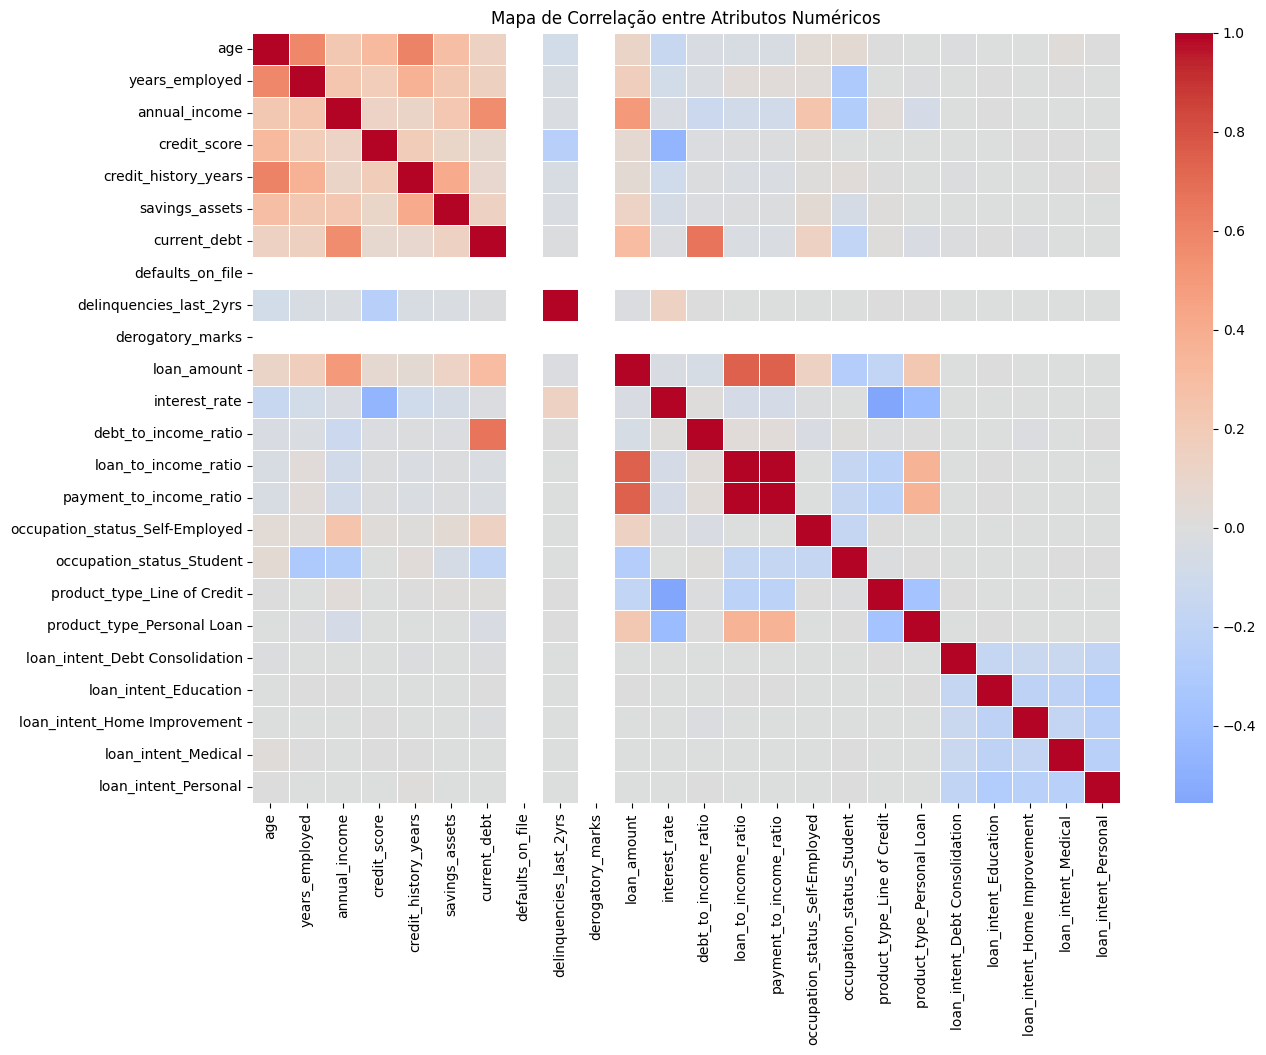

In [58]:
plt.figure(figsize=(14,10))
corr = X_train.corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Mapa de Correlação entre Atributos Numéricos')
plt.show()


Correlação com a variável alvo
Interpretação:

Valores mais altos (positivos ou negativos)
→ maior relação com o resultado do empréstimo

Valores próximos de 0
→ candidatos a remoção

In [59]:
corr_target = X_train.join(y_train).corr()['loan_status'].sort_values(ascending=False)

corr_target


loan_status                        1.000000
credit_score                       0.457020
age                                0.299047
credit_history_years               0.276460
years_employed                     0.208088
annual_income                      0.172742
savings_assets                     0.161557
loan_intent_Education              0.153275
loan_intent_Personal               0.088765
occupation_status_Self-Employed    0.035887
occupation_status_Student          0.027752
loan_intent_Medical               -0.016567
loan_intent_Home Improvement      -0.021112
product_type_Line of Credit       -0.022159
loan_amount                       -0.076884
current_debt                      -0.113771
interest_rate                     -0.122072
product_type_Personal Loan        -0.135375
loan_intent_Debt Consolidation    -0.149617
delinquencies_last_2yrs           -0.224109
loan_to_income_ratio              -0.239715
payment_to_income_ratio           -0.239717
debt_to_income_ratio            

KNN 

SEPARAÇÃO TREINO E TESTE

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Normalização

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


modelo KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=15,
    metric='minkowski',
    p=2
)

knn.fit(X_train_scaled, y_train)


,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predições

In [69]:
y_pred = knn.predict(X_test_scaled)


Métricas básicas

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8712
[[3573  922]
 [ 366 5139]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4495
           1       0.85      0.93      0.89      5505

    accuracy                           0.87     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Ajustando o valor de K (parte importante)

K pequeno:

mais sensível a ruído

K grande:

mais estável, mas pode perder detalhe

Testando vários K

In [71]:
scores = []

for k in range(3, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append((k, score))

scores


[(3, 0.8568),
 (5, 0.8673),
 (7, 0.8688),
 (9, 0.869),
 (11, 0.8685),
 (13, 0.8698),
 (15, 0.8712),
 (17, 0.87),
 (19, 0.868),
 (21, 0.8687),
 (23, 0.8684),
 (25, 0.8686),
 (27, 0.8659),
 (29, 0.8644)]

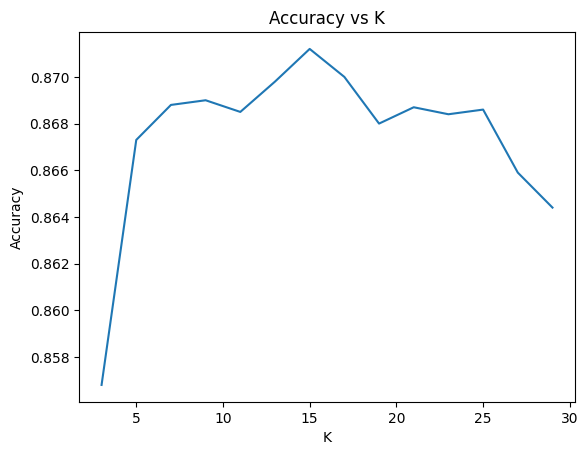

In [72]:
import matplotlib.pyplot as plt

k_vals, accs = zip(*scores)

plt.plot(k_vals, accs)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()


arvore de decisão

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Por que esses parâmetros:

max_depth=5 → evita overfitting

min_samples_leaf=50 → evita regras baseadas em poucos casos

gini → padrão e eficiente

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=50,
    random_state=42
)

dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


avaliação do modelo

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.851
[[3552  943]
 [ 547 4958]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      4495
           1       0.84      0.90      0.87      5505

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [77]:
import pandas as pd

importances = pd.Series(
    dt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)


credit_score               0.530490
debt_to_income_ratio       0.265819
credit_history_years       0.070746
defaults_on_file           0.055144
loan_to_income_ratio       0.035603
delinquencies_last_2yrs    0.026465
loan_intent_Education      0.013663
payment_to_income_ratio    0.001811
loan_intent_Personal       0.000259
current_debt               0.000000
dtype: float64

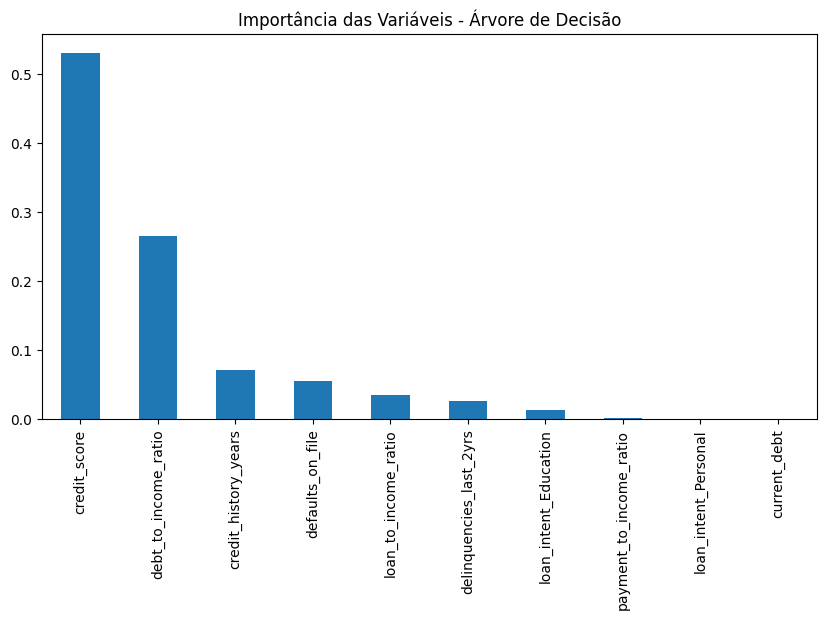

In [78]:
import matplotlib.pyplot as plt

importances.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Importância das Variáveis - Árvore de Decisão")
plt.show()


Visualizando a árvore

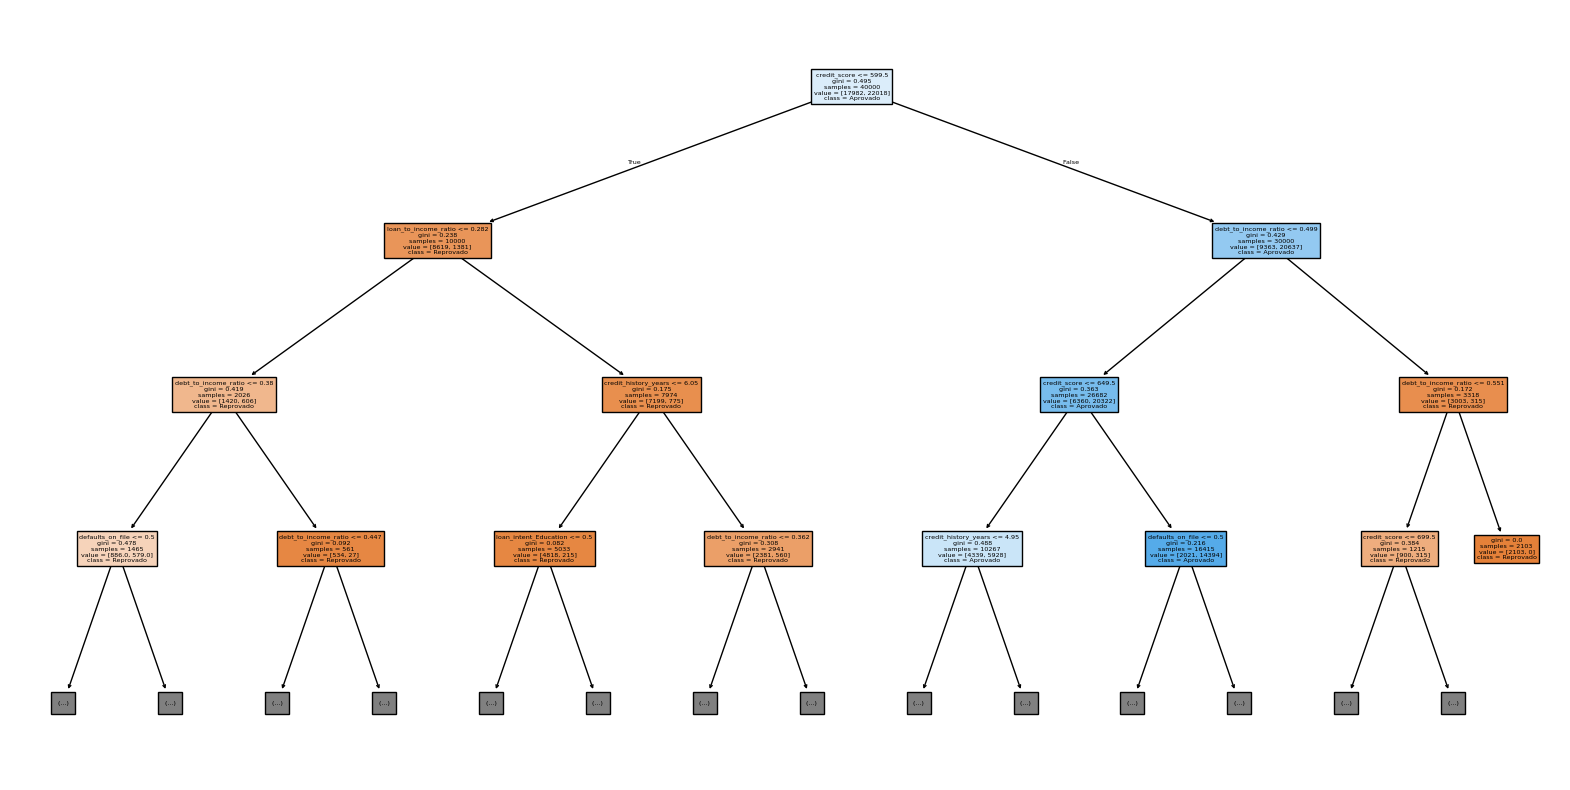

In [79]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=['Reprovado', 'Aprovado'],
    filled=True,
    max_depth=3
)
plt.show()


K-means

In [80]:
X = df.drop(columns=['loan_status'])

não há target

não há treino/teste

é exploração

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Escolhendo o número de clusters (Elbow Method)

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


Visualização

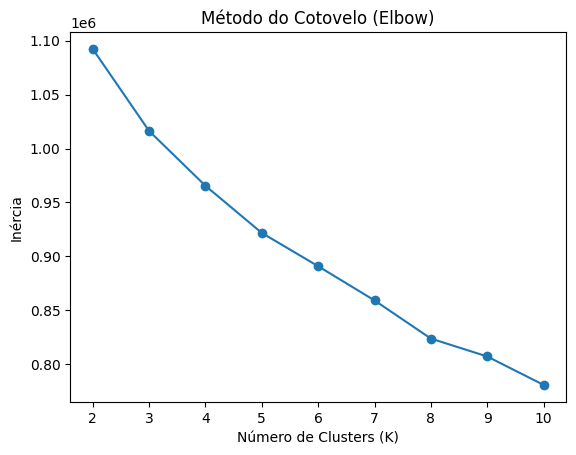

In [83]:
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo (Elbow)")
plt.show()


Agora cada cliente pertence a um grupo.

In [84]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


Média das variáveis por cluster

In [85]:
cluster_profile = df.groupby('cluster').mean()
cluster_profile


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,...,loan_status,occupation_status_Self-Employed,occupation_status_Student,product_type_Line of Credit,product_type_Personal Loan,loan_intent_Debt Consolidation,loan_intent_Education,loan_intent_Home Improvement,loan_intent_Medical,loan_intent_Personal
cluster,,,,,,,,,,,,,,,,,,,,,
0,33.830039,6.712228,44618.062337,639.501738,7.516203,2267.637381,12074.154974,0.057667,0.564183,0.157363,...,0.519765,0.186034,0.100891,1.000000,0.000000,0.100130,0.196242,0.145634,0.156169,0.251195
1,33.320728,6.551861,42948.641607,642.789087,7.182887,2084.859720,11351.348768,0.049185,0.548996,0.138537,...,0.439560,0.191967,0.069193,0.000000,0.722925,0.093293,0.203107,0.152103,0.153013,0.247291
2,44.893447,14.007571,86897.159397,680.921311,13.524645,10188.431975,27879.693217,0.022098,0.376922,0.075327,...,0.743563,0.347905,0.003459,0.078209,0.350307,0.094831,0.206764,0.139796,0.156802,0.252018
3,30.800396,4.578195,36137.560242,623.862819,6.030706,1474.759497,9505.520856,0.073535,0.661470,0.193205,...,0.535110,0.134505,0.172901,0.000000,0.252371,0.103380,0.203328,0.154168,0.145965,0.246088


K-Means não usou o target

só está analisando depois

Isso é estatisticamente limpo.

In [86]:
df.groupby('cluster')['loan_status'].mean()

cluster
0    0.519765
1    0.439560
2    0.743563
3    0.535110
Name: loan_status, dtype: float64

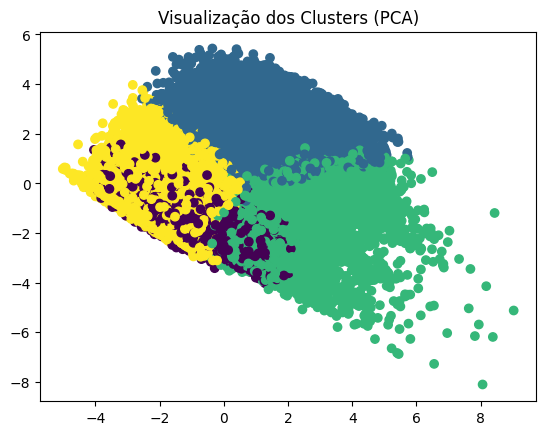

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.title("Visualização dos Clusters (PCA)")
plt.show()
